In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import math 
import networkx as nx

In [2]:
df = pd.read_csv("/Users/morrow/Documents/Uni_Winter_19_20/SNA/Exercise/exercise_4/currentNetwork.csv", sep=";")

In [3]:
df.columns = ["source", "target", "weight"]

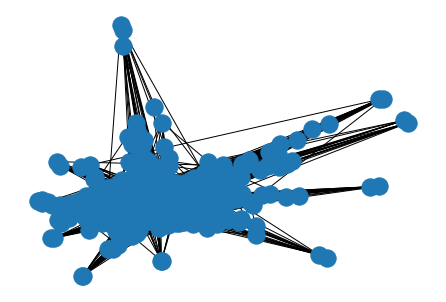

In [4]:
# Exercise 1
G = nx.Graph()
G = nx.from_pandas_edgelist(df, source="source", 
                            target="target", edge_attr=True)

# Plot the graph 
nx.draw(G, with_labels=False)
plt.savefig("SNA_ex_4.png", dpi=300)
plt.show()

In [5]:
print("Graph has", len(G), "nodes")
print("Graph has", G.number_of_edges(), "edges")
print("The density is:", nx.density(G))

Graph has 1995 nodes
Graph has 9973 edges
The density is: 0.005014039612572052


In [6]:
# Exercise 4
betweenness_centrality = nx.betweenness_centrality(G, k=None, normalized=True, weight="weight")
degree_centrality = nx.degree_centrality(G)
closeness_centrality = nx.closeness_centrality(G)
dfNodeMetrics = pd.DataFrame(columns=["Name", "Degree", "Degree_Centrality", "Betweenness", "Closeness_Centrality"]) 
print(dfNodeMetrics)
for node in G:
    sName = str(node)
    dDegree = G.degree(node)
    betweenness = betweenness_centrality[node]
    centrality = degree_centrality[node]
    closeness = closeness_centrality[node]
    dfNodeMetrics = dfNodeMetrics.append({"Name": sName, "Degree": dDegree, "Betweenness" : betweenness, "Degree_Centrality" : centrality, "Closeness_Centrality" : closeness}, ignore_index=True) 
    
print(dfNodeMetrics)

# Save as Excel 
dfNodeMetrics.to_excel("NodeMetrics.xlsx")

Empty DataFrame
Columns: [Name, Degree, Degree_Centrality, Betweenness, Closeness_Centrality]
Index: []
                    Name Degree  Degree_Centrality  Betweenness  \
0       Wilbert Knuckles      6           0.003009     0.001494   
1             Mary Frank      3           0.001505     0.000000   
2     Margarita Brunetto     10           0.005015     0.003917   
3            Pat Coleman     14           0.007021     0.001329   
4         Carolyn Fields      9           0.004514     0.005246   
...                  ...    ...                ...          ...   
1990    Adina Richardson      5           0.002508     0.000000   
1991       James Terrell      4           0.002006     0.000002   
1992    Richard Fletcher      2           0.001003     0.000773   
1993       Lorenzo Myers      3           0.001505     0.000000   
1994         Holly Lewis      2           0.001003     0.000000   

      Closeness_Centrality  
0                 0.261989  
1                 0.247425  
2   

In [7]:
dfNodeMetrics.groupby(["Degree"]).max()

,Name,Degree_Centrality,Betweenness,Closeness_Centrality
Degree,,,,
2,Richard Fletcher,0.001003,0.000773,0.236144
3,Thomas Berg,0.001505,0.000134,0.258927
4,Wayne Truitt,0.002006,0.005411,0.264421
5,Zachary James,0.002508,0.005366,0.274542
6,Wilmer Stankiewicz,0.003009,0.015775,0.277793
7,Yvonne Waters,0.003511,0.045859,0.282077
8,Yvonne Thompson,0.004012,0.027829,0.293322
9,Zoe Horace,0.004514,0.051514,0.289405
10,Willis Willbanks,0.005015,0.051045,0.298727


In [8]:
dfNodeMetrics.groupby(["Degree"]).mean()

,Degree_Centrality,Betweenness,Closeness_Centrality
Degree,,,
2,0.001003,0.000258,0.233796
3,0.001505,0.000010,0.247226
4,0.002006,0.000489,0.255893
5,0.002508,0.000538,0.262588
6,0.003009,0.001398,0.267319
7,0.003511,0.002236,0.271565
8,0.004012,0.002052,0.275816
9,0.004514,0.003399,0.279532
10,0.005015,0.003853,0.283300


In [9]:
# Exercise 4 Part II 


# Node with highest Degree 
#dfNodeMetrics.Degree.max()
dfNodeMetrics["Degree"] = dfNodeMetrics["Degree"].apply(pd.to_numeric, errors = 'coerce')
print("Node with highest Degree Centrality", "\n", 
      dfNodeMetrics.loc[dfNodeMetrics["Degree"].idxmax()])

print("\n")

# Node with highest Degree Centrality 
dfNodeMetrics["Degree_Centrality"] = dfNodeMetrics["Degree_Centrality"].apply(pd.to_numeric, errors = 'coerce')
print("Node with highest Degree Centrality", "\n", 
      dfNodeMetrics.loc[dfNodeMetrics["Degree_Centrality"].idxmax()])

print("\n")


# Node with highest Closeness Centrality 
dfNodeMetrics["Closeness_Centrality"] = dfNodeMetrics["Closeness_Centrality"].apply(pd.to_numeric, errors = 'coerce')
print("Node with highest Degree Centrality", "\n", 
      dfNodeMetrics.loc[dfNodeMetrics["Closeness_Centrality"].idxmax()])

print("\n")


# Node with highest Betweenness Centrality
dfNodeMetrics["Betweenness"] = dfNodeMetrics["Betweenness"].apply(pd.to_numeric, errors = 'coerce')
print("Node with highest Degree Centrality", "\n", 
      dfNodeMetrics.loc[dfNodeMetrics["Betweenness"].idxmax()])

Node with highest Degree Centrality 
 Name                    Michael Williams
Degree                                34
Degree_Centrality              0.0170512
Betweenness                    0.0516659
Closeness_Centrality            0.334115
Name: 644, dtype: object


Node with highest Degree Centrality 
 Name                    Michael Williams
Degree                                34
Degree_Centrality              0.0170512
Betweenness                    0.0516659
Closeness_Centrality            0.334115
Name: 644, dtype: object


Node with highest Degree Centrality 
 Name                    Michael Williams
Degree                                34
Degree_Centrality              0.0170512
Betweenness                    0.0516659
Closeness_Centrality            0.334115
Name: 644, dtype: object


Node with highest Degree Centrality 
 Name                    Roger Jefferson
Degree                               14
Degree_Centrality            0.00702106
Betweenness                   0.

In [34]:
# Exercise 5 
# Bridge 

print(list(nx.bridges(G)), nx.has_bridges(G))

[] False


In [49]:
from pyvis.network import Network
c_net = Network(height="1080px", width="100%", bgcolor="#000000", font_color="g")
# set the physics layout of the network
c_net.barnes_hut()
c_data = pd.read_csv("/Users/morrow/Documents/Uni_Winter_19_20/SNA/Exercise/exercise_4/currentNetwork.csv", sep=";")
c_data.columns = ["source", "target", "weight"]
sources = c_data['source']
targets = c_data['target']
weights = c_data['weight']

edge_data = zip(sources, targets, weights)

for e in edge_data:
    src = e[0]
    dst = e[1]
    w = e[2]

    c_net.add_node(src, src, title=src)
    c_net.add_node(dst, dst, title=dst)
    c_net.add_edge(src, dst, value=w)

neighbor_map = c_net.get_adj_list()

# add neighbor data to node hover data
for node in c_net.nodes:
    node["title"] += " Neighbors:<br>" + "<br>".join(neighbor_map[node["id"]])
    node["value"] = len(neighbor_map[node["id"]])

#got_net.set_options("")"""
c_net.show_buttons(filter_=['weights'])
c_net.show_buttons(filter_=['nodes', 'edges', 'physics'])

c_net.show("/Users/morrow/Documents/Uni_Winter_19_20/SNA/Exercise/exercise_4/current_network.html")